# Hands-On Workshop - Big Data in Healthcare 8400

### Hadas Volkov - July 2023

Azure space and resources were kindly contributed by **Microsoft**

Welcome to this hands-on workshop on Big Data in Healthcare. In this workshop, we will explore the use of machine learning for predicting diabetes. We will be using a dataset that contains various health metrics for a number of individuals, some of whom have been diagnosed with diabetes. Our goal is to train a machine learning model on this data, so that it can predict whether a new individual has diabetes based on their health metrics.

We will be covering the following topics:

1. Introduction to the dataset and problem
2. Data preprocessing and exploration
3. Training machine learning models
4. Evaluating model performance
5. Discussion and next steps

Let's get started!

## Predicting Diabetes - A Machine Learning Approach
In this notebook, we will be exploring the use of Machine Learning (ML) for predicting diabetes. Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Insulin is a hormone that regulates blood sugar. Hyperglycaemia, or raised blood sugar, is a common effect of uncontrolled diabetes and over time leads to serious damage to many of the body's systems, especially the nerves and blood vessels.

We will be using a dataset that contains various health metrics for a number of individuals, some of whom have been diagnosed with diabetes. Our goal is to train an ML model on this data, so that it can predict whether a new individual has diabetes based on their health metrics.

This is a classic example of a binary classification problem, where each individual is classified into one of two categories: 'has diabetes' or 'does not have diabetes'. We will be exploring various ML models and techniques to tackle this problem.

## 1. Introduction to the dataset and problem
### About the Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. [Pima Indians Diabetes Database on Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download)

### Data Analysis
The platform chosen for this exercise is a Jupyter notebook. For data scientists, notebooks are a crucial tool. Notebooks are a form of interactive computing, in which users write and execute code, visualize the results, and share insights. Typically, data scientists use notebooks for experiments and exploration tasks. </br>
It is not expected of you to fully understand the code, it is here for you if you’d like to dive deeper, but whether this form of presentation allows me to integrate the computing environment and to facilitate the work of a data scientist to you. </br>
You are asked to follow the notebook and execute each code block by highlighting the block and using the ‘play’ button above, or use the keyboard shortcut ‘shift+enter’ to execute.


#### Python and python packages
The python programing language has dominated the field of machine learning for the past years. There are two main reasons; One, python is a relatively simple to pick up for non-coders and facilitate the most intuitive programing syntax. The second reason, and the more important one, is the abundance of packages available for python users, especially for data scientists. A python package is a program written in python and offers some specific functionality to the user. For example, the ‘pandas’ package allows for handling csv and text files easily, ‘scikit-learn’ wraps almost all common machine learning algorithms, making it easy for us to quickly test variety of methods on our data.


In the bellow code block we’ll import some packages and functions for our analysis. Please execute the block before moving forward

In [27]:
# pandas for data manipulation, numpy for numerical computation
import pandas as pd
import numpy as np

# matplotlib and seaborn for plotting and visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# sklearn for machine learning algorithms and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC

# mlxtend for some additional machine learning tools
from mlxtend.plotting import plot_decision_regions

# tensorflow and keras for deep learning
import tensorflow as tf
from tensorflow import keras

# scipy for scientific computation
from scipy.stats import pearsonr

# warnings for handling future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Preprocessing

We will start by importing our dataset to our environment and saving it under the name ‘df’ (short for csv dataframe). The data is kept in a ‘csv’ file named ‘diabetes.csv’ in the current directory as this notebook. </br>
The command ‘df.head()’ will print the first five rows in the file

In [3]:
# Import dataset and save it as 'df'
df = pd.read_csv('diabetes.csv') 

# Display the first five rows in the file
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


The dataset contains 768 observable values with eight feature variables and one target variable. Before starting to analyze the data and draw any conclusions, it is essential to understand the presence of missing values in any dataset. To do so, the simplest way is to use 'df.info()' function which will provide us the column names with the type of data in each column.

In [4]:
# Get initial information on the dataset including data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


There are five features in the data that contain null values, Glucose, BloodPressure, SkinThickness, Insulin and BMI. A null value is a special marker to indicate that a data value does not exist in the database. In other words, it is just a placeholder to denote values that are missing or that we do not know. </br> 
We can perform a quick calculation and print the percentage of missing values for each feature

In [5]:
### Handling Missing Data
# Identify columns with null values and print percentage of missing values for each
# Function to calculate and display missing values
def display_missing_data(dataframe):
    missing_values = dataframe.isnull().sum()
    percent_missing = (missing_values * 100) / dataframe.shape[0]
    missing_df = pd.DataFrame({'Column': dataframe.columns,
                                 'Total Missing Values': missing_values,
                                 'Percent of Missing Values': percent_missing})
    print(missing_df)

print("\nMissing Data:")
display_missing_data(df)


Missing Data:
                                            Column  Total Missing Values   
Pregnancies                            Pregnancies                     0  \
Glucose                                    Glucose                     5   
BloodPressure                        BloodPressure                    35   
SkinThickness                        SkinThickness                   227   
Insulin                                    Insulin                   374   
BMI                                            BMI                    11   
DiabetesPedigreeFunction  DiabetesPedigreeFunction                     0   
Age                                            Age                     0   
Outcome                                    Outcome                     0   

                          Percent of Missing Values  
Pregnancies                                0.000000  
Glucose                                    0.651042  
BloodPressure                              4.557292  
SkinThic

Next, we can try and discard rows containing these values.

In [6]:
# Drop all rows containing a null values and get information on the new dataset
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


Removing all rows containing null values significantly reduced our dataset to only 392 entries. Instead, we can perform mean imputation, or mean substitution, replacing missing values of a certain variable by the mean of non-missing cases of that variable.

Note: Mean imputation was chosen as it is a simple and common method of handling missing data. 
However, it can introduce bias if the data is not normally distributed.

In [7]:
# Handling missing data - Mean Imputation
missing_cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for col in missing_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Display information of the cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


## 2. Data preprocessing and exploration
### Data Visualization

To get an initial ‘feel’ of data we can plot a few visualization schemes for our data.
It's essential to understand our data before we start with our analyses. Data visualization is a great way to identify trends, patterns, and relationships in the data.  

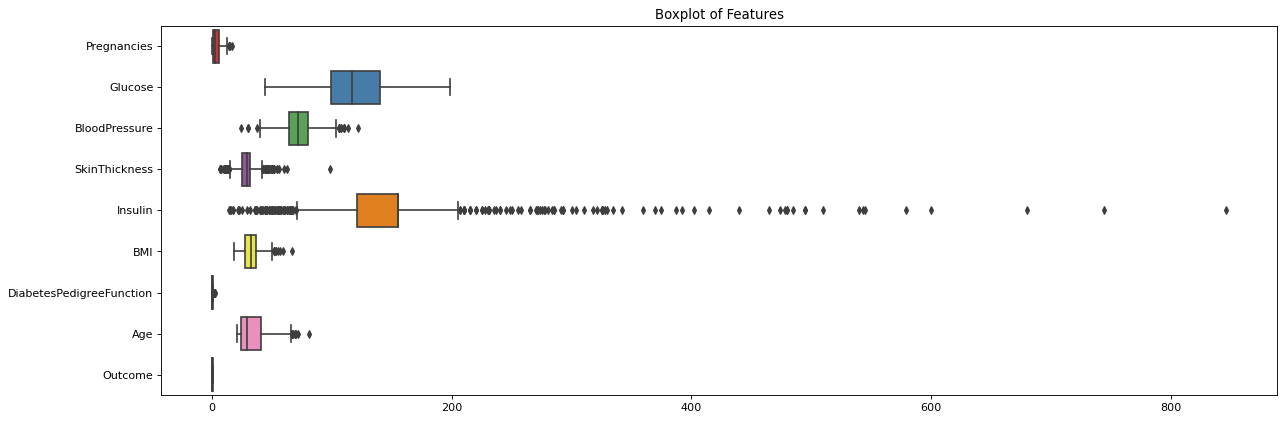

In [8]:
# Boxplots
# Boxplots help us identify outliers and understand our data's distribution.
plt.figure(figsize=(18, 6), dpi=80)
sns.boxplot(data=df, orient="h", palette="Set1")
plt.title('Boxplot of Features')
plt.show()

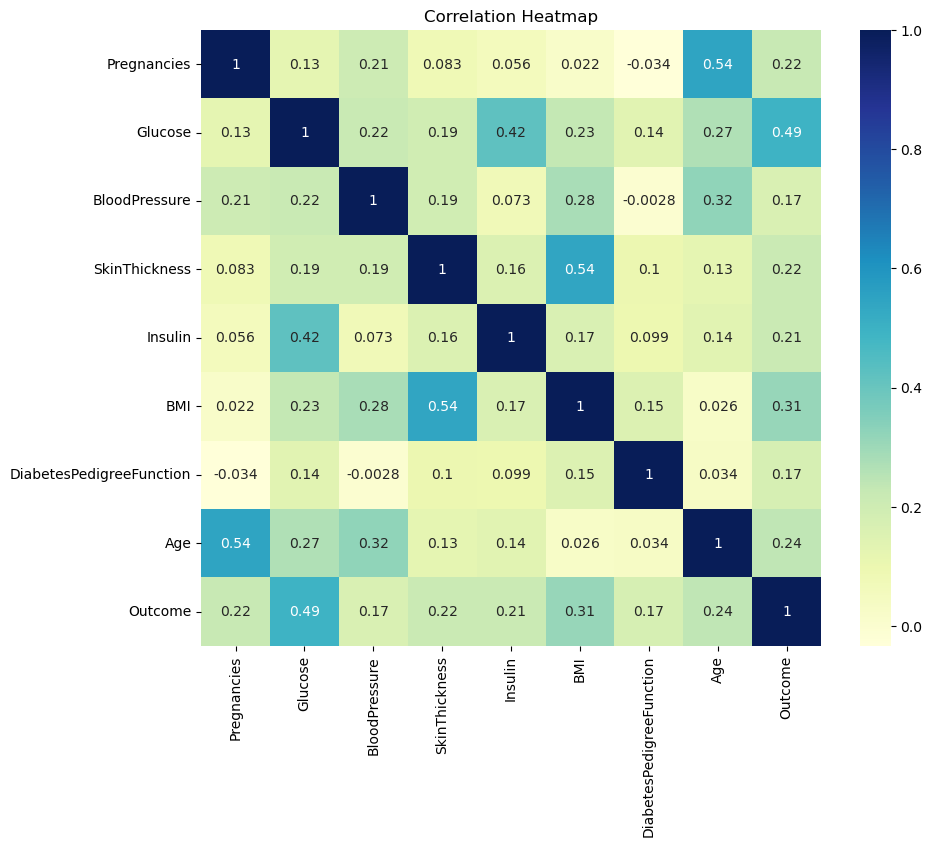

In [9]:
# Heatmap correlation
# A heatmap is used to understand the correlation between different features in the dataset. 
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.show()

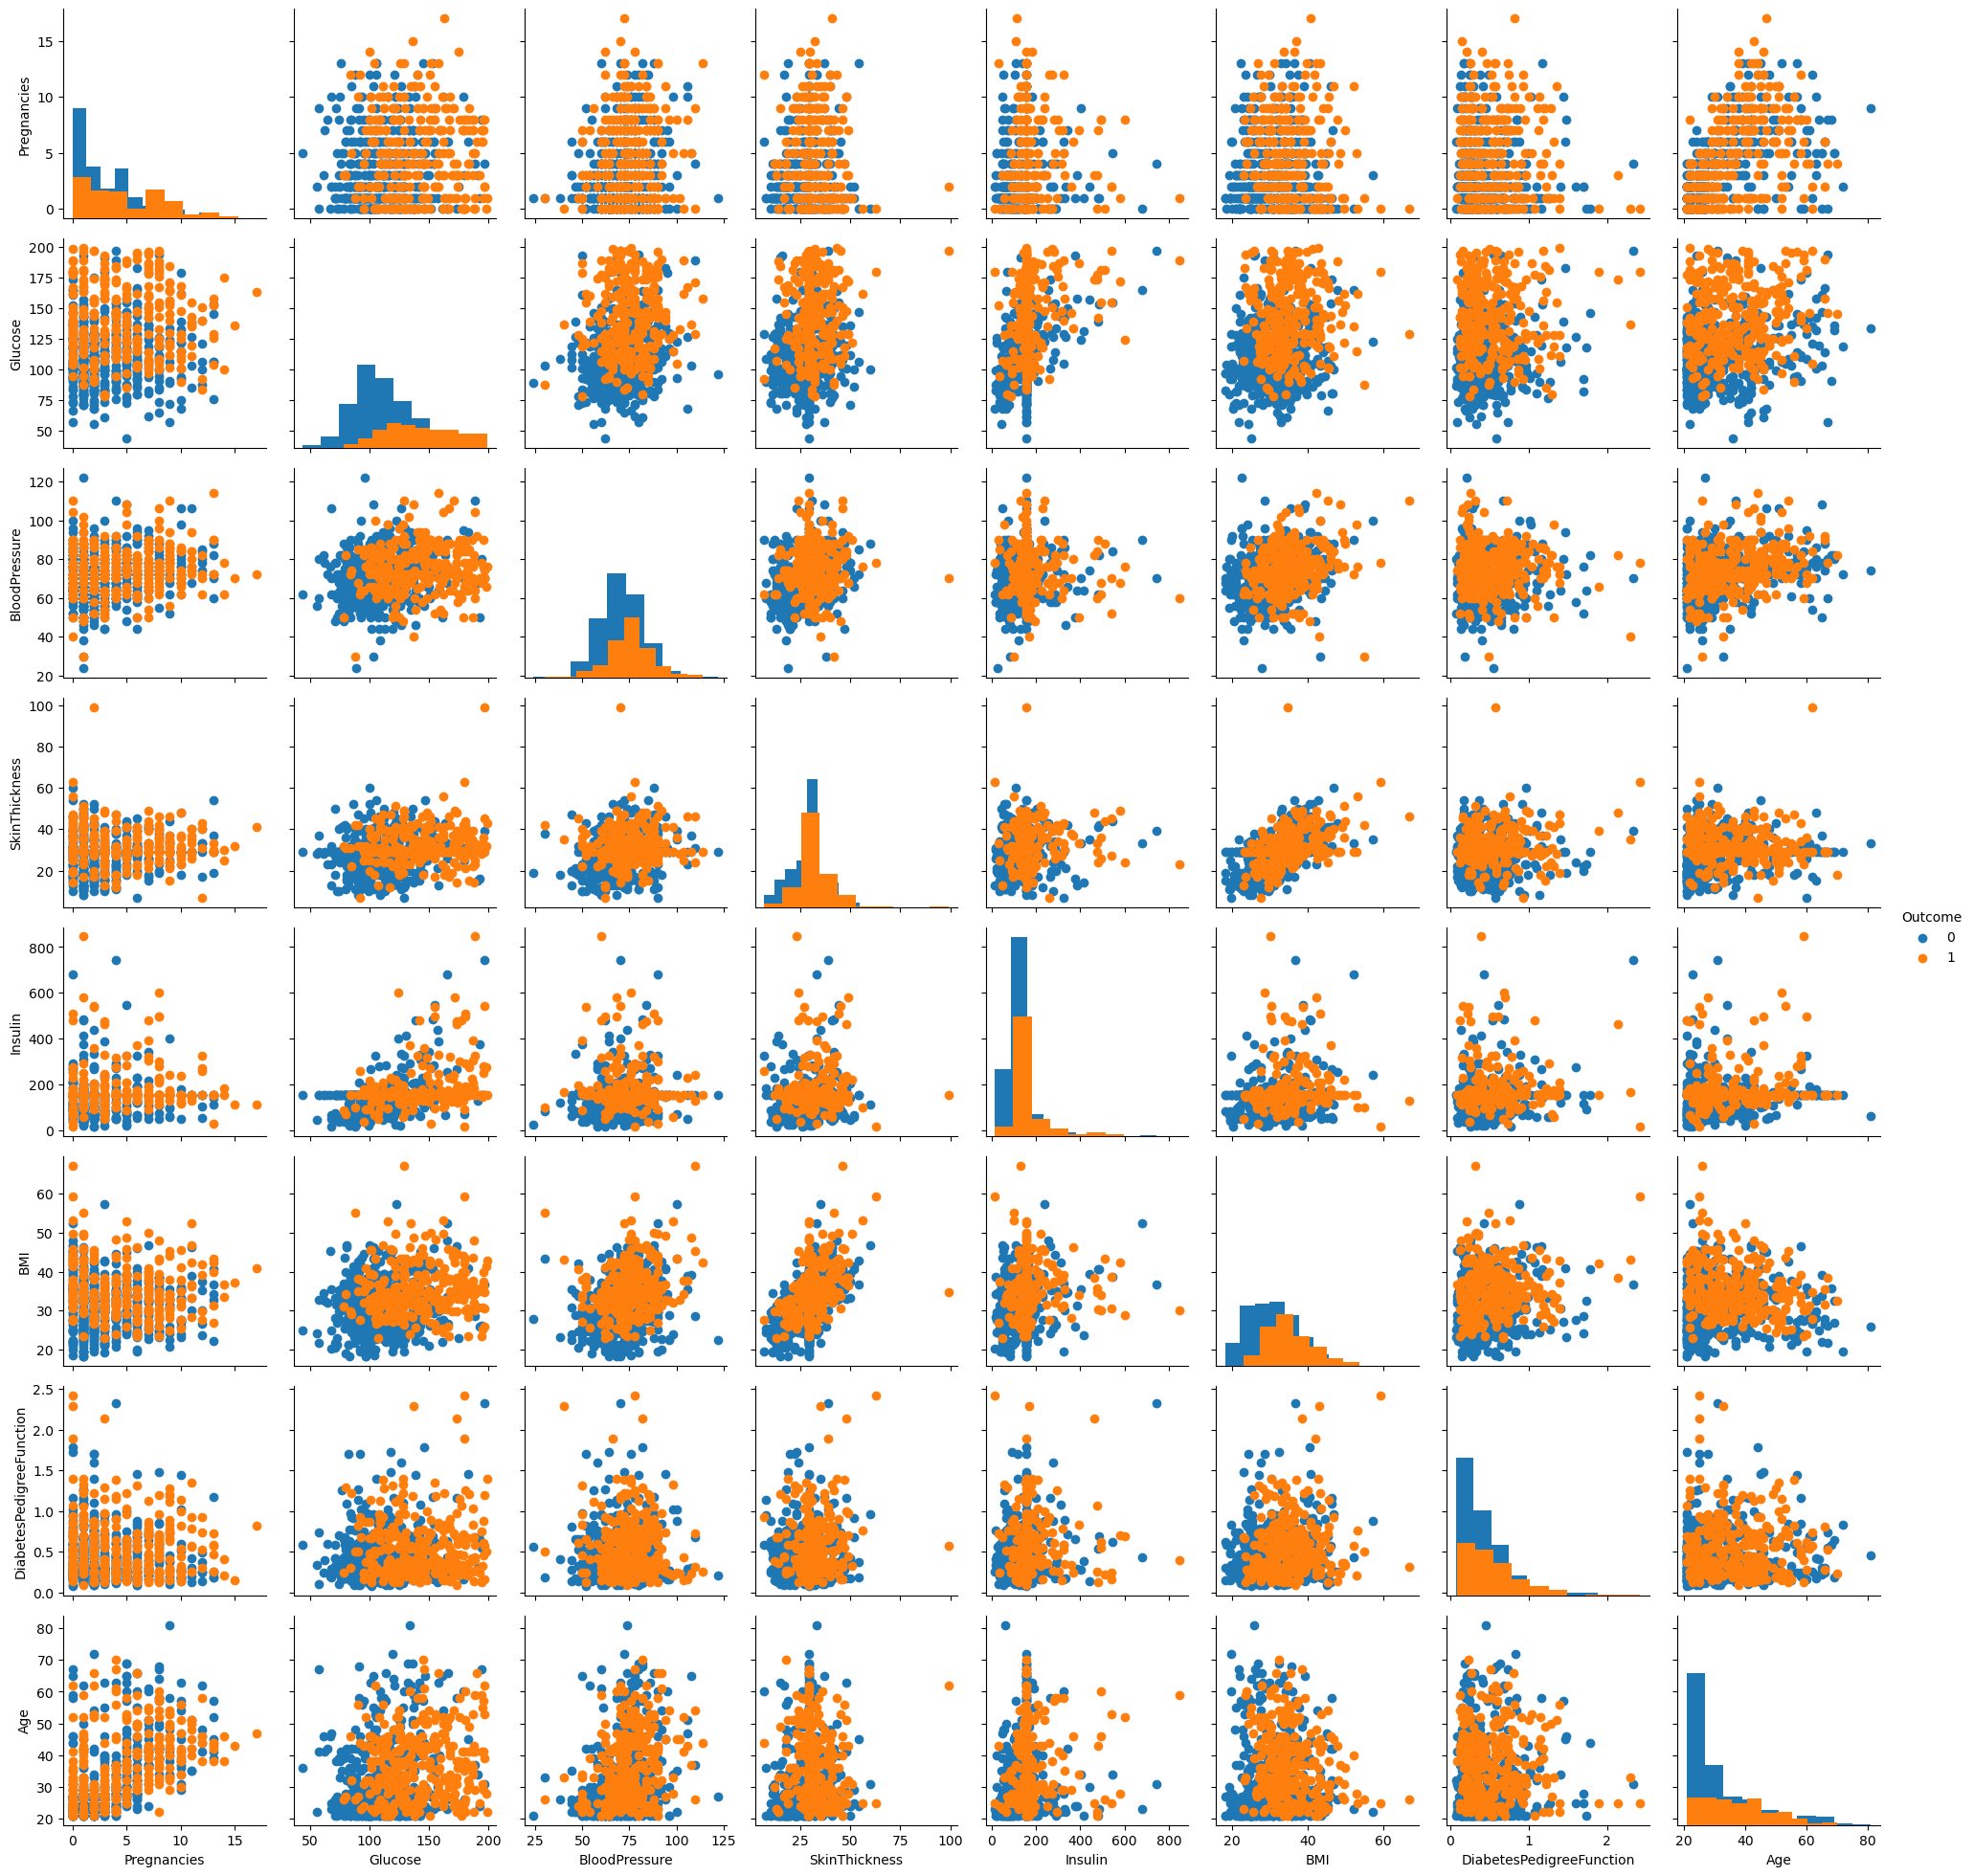

In [10]:
# Pairwise Relationships
# It helps to visualize pairwise relationships between different features.
# We'll use a PairGrid, which allows us to customize what kind of plots are shown.
graph = sns.PairGrid(df, hue ='Outcome')

# Histograms for the diagonal subplots
graph = graph.map_diag(plt.hist)

# Scatterplots for the non-diagonal subplots
graph = graph.map_offdiag(plt.scatter)

# Add legend
graph = graph.add_legend()

# Note: This operation may take a few seconds due to the amount of data being processed.

Open discussion - what can we learn from the plots?

1. What insights can we gather from the boxplots? Are there any features with a significant number of outliers?

2. Looking at the heatmap, which features appear to be highly correlated with each other? What might be the reason for this correlation?

3. In the pairwise relationship plots, do you notice any specific trends or patterns between different features? How could these relationships impact the outcome?

4. Considering the data visualization results, do you have any preliminary hypotheses or predictions about which features might be most predictive of the outcome?

5. How could we further enhance our data visualization to extract more insights? For example, could additional plot types or more complex visualizations provide further clarity?

6. If we found that two features were strongly correlated, what might be the implications for our predictive modeling? Would it be beneficial to include both features in our model, or just one?

7. Based on these visualizations, are there any features that seem less relevant to the outcome? Could we consider removing them from our future analyses to simplify our model?

**Remember that these are open-ended questions and there might not be a single correct answer. The goal is to promote discussion and deeper analysis of the data.**

## 3. Classification

The next step in our process is to prepare our data for the classification training. This involves separating our dataset into two parts - features and targets. In data science, it's conventional to denote features with an 'X' and targets with 'y'. Let's start with this split:

In [11]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

To get a sense of our target variable distribution, we can plot a countplot.

<Axes: xlabel='Outcome', ylabel='count'>

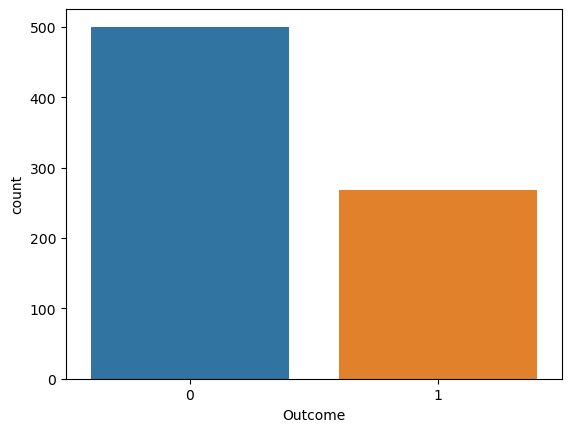

In [12]:
sns.countplot(x="Outcome", data=df)

Once we have our features and targets defined, we will partition our dataset into training and testing sets. A typical split might be 80% of the data for training, and 20% for testing.

In [13]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

Before we implement our classification algorithm, we need to scale the feature variables of our dataset. This process, often called feature scaling, involves adjusting the distribution of each feature such that the mean of observed values is 0 and the standard deviation is 1.

In [14]:
scaling_x = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)

Why is feature scaling important?

In many machine learning algorithms, the result can vary based on the scale of the features. This is especially true for algorithms that use a distance-based metric for calculations. If one feature has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

### Training and Evaluating Models

Now, we'll move on to the main part of this workshop, where we experiment with various prediction algorithms and assess their performance on our dataset.

#### 3.1 K-Nearest  (KNN)

KNN is a non-parametric and lazy learning algorithm. Non-parametric means that there is no assumption for the underlying data distribution, allowing flexibility for datasets that don't adhere to specific mathematical assumptions. Lazy learning refers to the fact that the algorithm doesn't require any training data points for model generation; instead, all training data is used in the testing phase.

In KNN, the value of K represents the number of nearest neighbors to consider. It is a crucial deciding factor, typically an odd number for binary classification problems. When K equals 1, the algorithm is known as the nearest neighbor algorithm, which is the simplest case.

![title](img/knn.png)

Let's start by training a KNN model with just one neighbor and evaluate its classification accuracy:

In [15]:
# KNN with one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Calssifiction accuracy with one neighbor: ", "{:.3f}".format(accuracy_score(y_test, y_pred)))

Calssifiction accuracy with one neighbor:  0.753


With only one neighbor our model’s classification accuracy is 75.3%. </br>

Next, we can explore a range of neighbor values to see if we can improve the performance:

Minimum error with 31 neighbors: 0.175


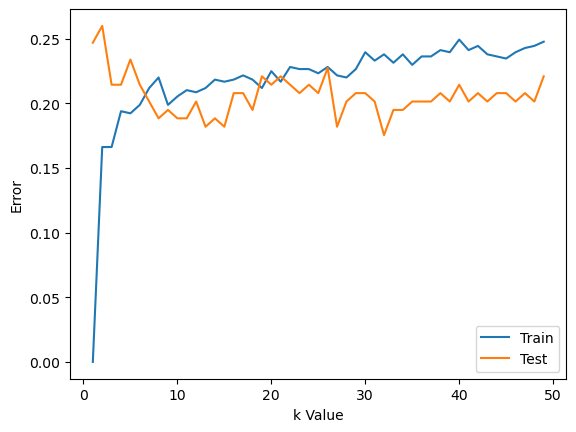

In [16]:
error1 = []
error2 = []
neighbors = range(1, 50)

for k in neighbors:
    # Using KNN algorithm
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred1 = knn.predict(X_train)

    # Storing the errors
    error1.append(np.mean(y_train != y_pred1))
    y_pred2 = knn.predict(X_test)
    error2.append(np.mean(y_test != y_pred2))

# Plotting the error rates for training and testing
plt.plot(neighbors, error1, label="Train")
plt.plot(neighbors, error2, label="Test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

min_knn_value = min(error2)
min_knn_index = error2.index(min_knn_value)
print("Minimum error with {} neighbors: {:.3f}".format(min_knn_index, min_knn_value))

From the error rate plot, we can observe the minimum test error is achieved with 31 neighbors. We can compute the accuracy value for that k. Additionally, let's compute the confusion matrix to evaluate the precision of our model:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       107
           1       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154



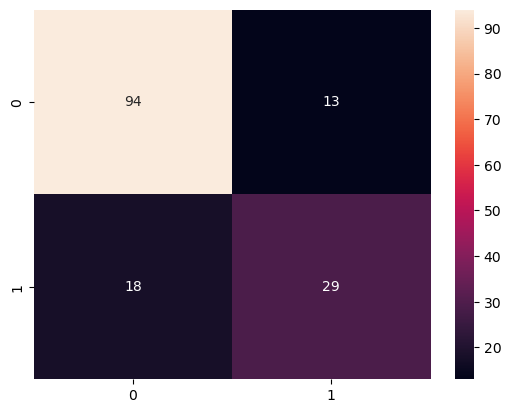

In [17]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

# Classification report
print(classification_report(y_test, y_pred))

##### Evaluation Metrics:
The classification report provides us with various evaluation metrics such as precision, recall, and F1-score. Precision represents the ratio of true positive predictions to the total predicted positives, recall represents the ratio of true positive predictions to the total actual positives, and F1-score is the harmonic mean of precision and recall. These metrics give us a comprehensive understanding of the model's performance.

##### Confusion Matrix:
The confusion matrix visualizes the performance of our model by showing the true positive, true negative, false positive, and false negative predictions. It helps us understand the model's ability to correctly classify instances and detect any biases or imbalances in the predictions.

By analyzing the classification report and the confusion matrix, we can gain valuable insights into the model's precision, recall, and overall performance.

In summary, the KNN model with 31 neighbors achieves the minimum error rate on the test set. The evaluation metrics provide a comprehensive understanding of the model's performance, enabling

#### 3.2 Support Vector Machines

Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. SVM constructs a hyperplane in multidimensional space to separate different classes. SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error. The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes.

![title](img/svm.jpg)

Let's train an SVM classifier with a linear kernel and evaluate its performance:

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154



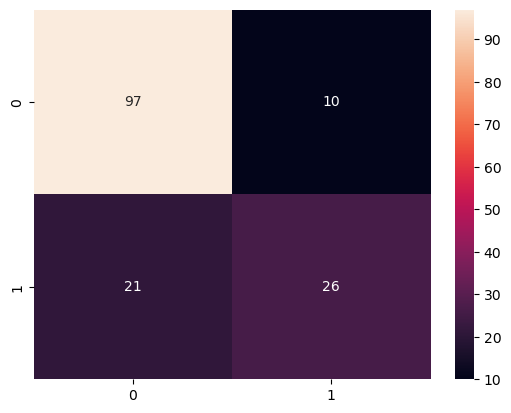

In [18]:
# Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

# Classifiction report
print(classification_report(y_test, y_pred))

#### 3.3 Random Forests Classifier

Random forests creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       107
           1       0.70      0.66      0.68        47

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154



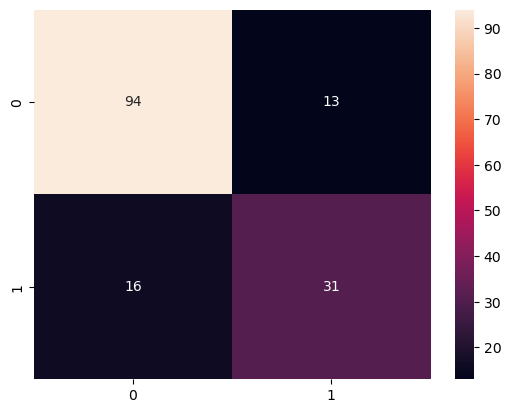

In [19]:
# Create a Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

# Classifiction report
print(classification_report(y_test, y_pred))

Random forests also offers a good feature selection indicator. The below compution plots the relative importance or contribution of each feature in the prediction. It automatically computes the relevance score of each feature in the training phase. Then it scales the relevance down so that the sum of all scores is 1.

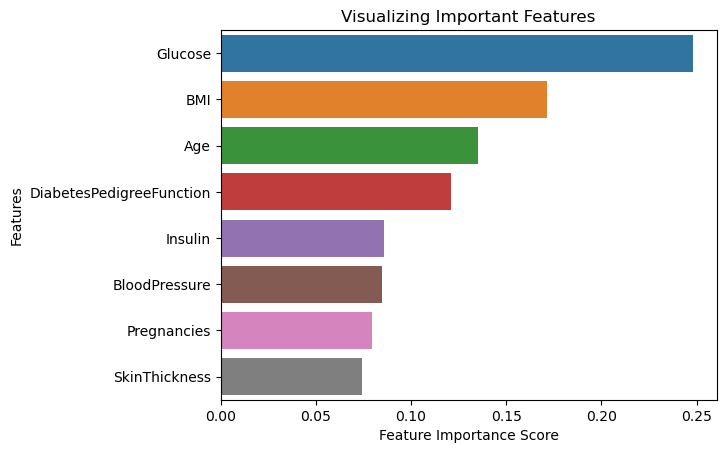

In [20]:
# Calculate feature importance
feature_imp = pd.Series(rfc.feature_importances_,index=df.columns[:-1]).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

#### 3.4 Neural Network Classifier
Neural networks are a popular choice for various machine learning tasks, including classification. They consist of multiple interconnected layers of nodes (neurons) that process input data and learn to make predictions. For this example, we'll use the Keras library, which provides a high-level API for building and training neural networks.

We can define and train a neural network model:

In [29]:
# Define the neural network architecture
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(8,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

After training the model, we can evaluate its performance and visualize the learning progress:

5/5 [==============================] - 0s 1ms/step - loss: 0.4309 - accuracy: 0.7857
Test accuracy: 0.7857142686843872


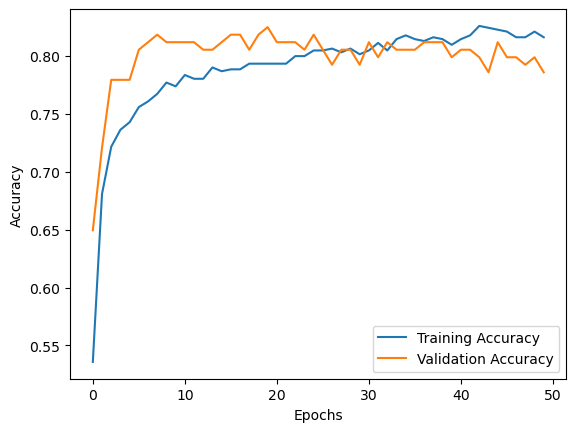

In [30]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot the learning curve
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This neural network example provides an alternative approach to predicting diabetes based on the given dataset. By adjusting the architecture, hyperparameters, and training process, you can explore different variations and potentially improve the model's performance.

## Discussion

1. Based on the performance evaluation of the different classification algorithms (K-Nearest Neighbors, Support Vector Machines, Random Forests, Neural Networks), which algorithm would you recommend using for predicting diabetes? What factors influenced your decision?

2. In the feature importance plot generated by the Random Forests classifier, which features appear to have the highest predictive power for diabetes? How do these findings align with existing medical knowledge about diabetes risk factors?

3. The neural network model achieved a certain level of accuracy on the test set. Can you think of any strategies to further improve the model's performance? How would you approach optimizing the neural network architecture or adjusting hyperparameters?

4. How might the inclusion of additional data sources or features (such as patient demographics or lifestyle factors) impact the accuracy and utility of the prediction models? What challenges or opportunities might arise when integrating diverse data types?

5. In the context of healthcare, what potential benefits and risks are associated with using machine learning models for disease prediction? How can we ensure that these models are trustworthy and transparent to both healthcare professionals and patients?

6. Reflecting on the workshop as a whole, what were the most significant insights or takeaways you gained from exploring big data in healthcare and applying machine learning to predict diabetes? How might you apply this knowledge and experience in future healthcare data analysis projects?